In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

dataset_path = "C:\\Users\\ASLAM\\Desktop\\Syncner Training\\Phase 1\\Level25\\flowers"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [17]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), strides=2, padding='same', activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(5, activation='softmax')
])


In [18]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 128)        

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/20
109/109 [==============================] - 15s 123ms/step - loss: 1.4423 - accuracy: 0.3347 - val_loss: 1.2315 - val_accuracy: 0.4907
Epoch 2/20
109/109 [==============================] - 12s 108ms/step - loss: 1.1615 - accuracy: 0.5227 - val_loss: 1.0406 - val_accuracy: 0.5500
Epoch 3/20
109/109 [==============================] - 13s 120ms/step - loss: 1.0525 - accuracy: 0.5719 - val_loss: 0.9911 - val_accuracy: 0.5977
Epoch 4/20
109/109 [==============================] - 13s 120ms/step - loss: 1.0296 - accuracy: 0.5797 - val_loss: 0.9714 - val_accuracy: 0.6035
Epoch 5/20
109/109 [==============================] - 13s 122ms/step - loss: 0.9654 - accuracy: 0.6231 - val_loss: 0.9244 - val_accuracy: 0.6209
Epoch 6/20
109/109 [==============================] - 13s 123ms/step - loss: 0.9467 - accuracy: 0.6251 - val_loss: 0.9137 - val_accuracy: 0.6198
Epoch 7/20
109/109 [==============================] - 14s 125ms/step - loss: 0.9107 - accuracy: 0.6480 - val_loss: 0.8804 - val_ac

In [ ]:

class_names = list(train_generator.class_indices.keys())

x_batch, y_batch = next(val_generator)
y_pred = model.predict(x_batch)
y_pred_classes = np.argmax(y_pred, axis=1)


1/1 [==============================] - 0s 28ms/step


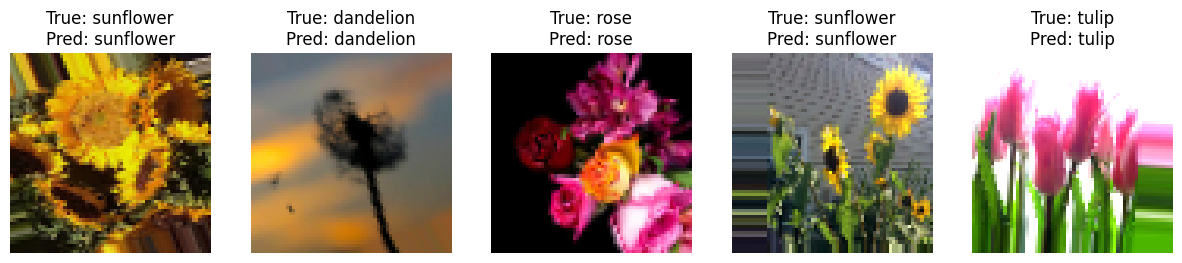

In [31]:
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[i])
    true_label = class_names[np.argmax(y_batch[i])]
    pred_label = class_names[y_pred_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.show()